In [11]:
# importing necessary libraries
import sys
print(sys.executable)
import numpy as np
import pandas as pd
import seaborn as sns 

import math
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge,Lasso,LinearRegression
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

/Users/satwik/Documents/MlProjects/newenv/bin/python


ValueError: Key backend: 'module://matplotlib_inline.backend_inline' is not a valid value for backend; supported values are ['gtk3agg', 'gtk3cairo', 'gtk4agg', 'gtk4cairo', 'macosx', 'nbagg', 'notebook', 'qtagg', 'qtcairo', 'qt5agg', 'qt5cairo', 'tkagg', 'tkcairo', 'webagg', 'wx', 'wxagg', 'wxcairo', 'agg', 'cairo', 'pdf', 'pgf', 'ps', 'svg', 'template']

In [9]:
import sys
print(sys.executable)

/Users/satwik/Documents/MlProjects/newenv/bin/python


In [10]:
# importing the csv file
data=pd.read_csv("Documents/data/StudentsPerformance.csv")

NameError: name 'pd' is not defined

In [9]:
# preparing the X, y variables
X=data.drop('math score',axis=1)
Y=data['math score']

In [11]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [22]:
numeric_features=X.select_dtypes(exclude="object").columns
categorical_features=X.select_dtypes(include="object").columns


# import the  Transformers for converting the data 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder

numericTransformer=StandardScaler()
catTransformer=OneHotEncoder()


preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder",catTransformer,categorical_features),
        ("StandardScaler",numericTransformer,numeric_features)
    ]
)

In [24]:
X=preprocessor.fit_transform(X)

In [26]:
X.shape

(1000, 19)

In [34]:
# creating data for the train and the test 

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

X_train.shape

(800, 19)

In [138]:
# traing the models 
models={
    "Linear_Regression":LinearRegression(),
    "Lasso_":Lasso(),
    "Ridge_":Ridge(),
    "Decision Tree":DecisionTreeRegressor(),
    "KNN":KNeighborsRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),

}
modelList=[]
r_2score=[]


In [139]:
models

{'Linear_Regression': LinearRegression(),
 'Lasso_': Lasso(),
 'Ridge_': Ridge(),
 'Decision Tree': DecisionTreeRegressor(),
 'KNN': KNeighborsRegressor(),
 'RandomForestRegressor': RandomForestRegressor(),
 'AdaBoost Regressor': AdaBoostRegressor(),
 'XGBRegressor': XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,

In [140]:
list(models)



['Linear_Regression',
 'Lasso_',
 'Ridge_',
 'Decision Tree',
 'KNN',
 'RandomForestRegressor',
 'AdaBoost Regressor',
 'XGBRegressor',
 'CatBoosting Regressor']

In [141]:
def evaluate(true,predicted):
    mae=mean_absolute_error(true, predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    mse=mean_squared_error(true,predicted)
    r2_square=r2_score(true,predicted)
    return mae,rmse,r2_square,mse

In [145]:
for i in range (len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)
    mae_train,rmse_train,r2_square_train,mse_train=evaluate(y_train,y_train_pred)
    mae_test,rmse_test,r2_square_test,mse_test=evaluate(y_test,y_test_pred)
    print(f"The values for the {list(models.keys())[i]}:")
    modelList.append(list(models.keys())[i])
    r_2score.append(r2_square_test)
    print(f"For the training data: mae = {mae_train}, rmse = {rmse_train}, r2 = {r2_square_train}")
    print(f"For the testing data: mae = {mae_test}, rmse = {rmse_test}, r2 = {r2_square_test}")
    print()

The values for the Linear_Regression:
For the training data: mae = 4.2697900390625, rmse = 5.325724196999284, r2 = 0.8741909314066747
For the testing data: mae = 4.23453125, rmse = 5.421247430809139, r2 = 0.8792220064484081

The values for the Lasso_:
For the training data: mae = 5.206302661246528, rmse = 6.593815587795566, r2 = 0.8071462015863456
For the testing data: mae = 5.157881810347763, rmse = 6.519694535667421, r2 = 0.8253197323627852

The values for the Ridge_:
For the training data: mae = 4.264987823725982, rmse = 5.323324922741654, r2 = 0.8743042615212909
For the testing data: mae = 4.211100688014262, rmse = 5.390387016935641, r2 = 0.8805931485028737

The values for the Decision Tree:
For the training data: mae = 0.01875, rmse = 0.2795084971874737, r2 = 0.9996534669718089
For the testing data: mae = 6.415, rmse = 8.132957641596322, r2 = 0.7281768927551098

The values for the KNN:
For the training data: mae = 4.51675, rmse = 5.707884897227694, r2 = 0.8554876322327585
For the 

In [152]:
table=pd.DataFrame(zip(modelList,r_2score),columns=['Model','R2Score'])
table

,Model,R2Score
0,Linear_Regression,0.879222
1,Lasso_,0.825320
2,Ridge_,0.880593
3,Decision Tree,0.728177
4,KNN,0.783813
5,RandomForestRegressor,0.852770
6,AdaBoost Regressor,0.853120
7,XGBRegressor,0.827797
8,CatBoosting Regressor,0.851632


In [154]:
table.sort_values('R2Score',ascending=False)

,Model,R2Score
2,Ridge_,0.880593
0,Linear_Regression,0.879222
6,AdaBoost Regressor,0.853120
5,RandomForestRegressor,0.852770
8,CatBoosting Regressor,0.851632
7,XGBRegressor,0.827797
1,Lasso_,0.825320
4,KNN,0.783813
3,Decision Tree,0.728177


In [155]:
# we can see that the rigde regression can explain the maximum variability

In [160]:
modelRidge=Ridge()
modelRidge.fit(X_train,y_train)
y_pred=modelRidge.predict(X_test)
score= r2_score(y_test,y_pred)*100
print(score)

88.05931485028738


Text(0, 0.5, 'Predicted')

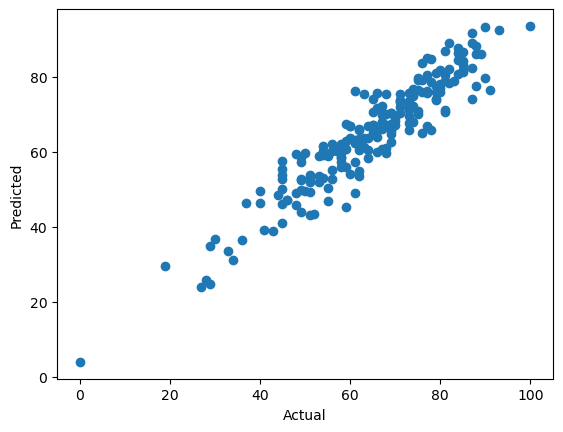

In [164]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='math score'>

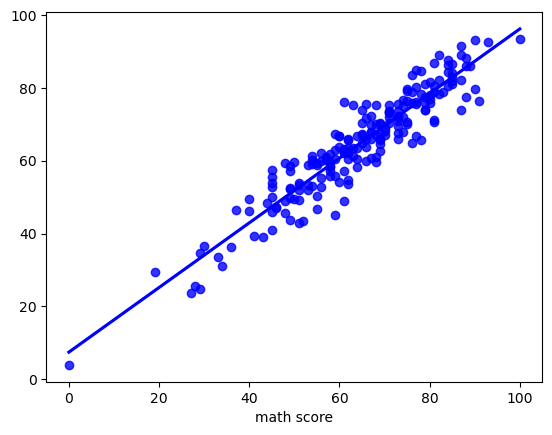

In [170]:
sns.regplot(x=y_test,y=y_pred,color='blue',ci=None)

In [176]:
pd.DataFrame({'Actual Value':y_test, 'Predicted Value':y_pred, 'Difference': abs(y_test-y_pred)})


,Actual Value,Predicted Value,Difference
521,91,76.398705,14.601295
737,53,58.842469,5.842469
740,80,76.992129,3.007871
660,74,76.805898,2.805898
411,84,87.615387,3.615387
...,...,...,...
408,52,43.492293,8.507707
332,62,62.170763,0.170763
208,74,67.910325,6.089675
613,65,67.061504,2.061504


In [ ]:
import jax.numpy as jnp
from jax import grad

# Define the function
def f(x):
    return x**2 + 3*x + 2

# Compute the gradient of the function
grad_f = grad(f)

# Evaluate the gradient at x = 2
x = 2.0
gradient_value = grad_f(x)

print(f"Gradient at x = {x}: {gradient_value}")


In [ ]:


# Define the function
def f(x):
    return x**2 + 3*x + 2

# Compute the gradient of the function
grad_f = grad(f)

# Evaluate the gradient at x = 2
x = 2.0
gradient_value = grad_f(x)

print(f"Gradient at x = {x}: {gradient_value}")
